<a href="https://colab.research.google.com/github/Ananya-22/CAMS/blob/main/Basic_code%2B6_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing and installation

In [1]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2d00c7722d347590189bb5952011eb441b69177d6d0801c8e6b5ef63af34c027
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 KB 19.5 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 1.9.1
    Uninstalling multimethod-1.9.1:
      Successfully uninstalled mu

In [ ]:
#installing tweet-preprocessor
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


#Dataset upload

In [33]:
df = pd.read_csv('mental_health.csv')

df.columns

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['text', 'label'], dtype='object')

In [34]:
# df=df.drop(['Unnamed: 0' , 'post_id' , 'post_created','user_id','followers', 'friends', 'favourites', 'statuses', 'retweets'],axis=1)
df.rename(columns = {'text':'original_tweets'}, inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
df.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,original_tweets,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


#Data cleaning

In [36]:
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# spell = SpellChecker()

# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
def remove_emoji(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji_data.unicode_emoji]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

# def remove_emoji(text):
#     emoji_pattern = re.compile(
#         "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         "]+",
#         flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)


def url_free_text(text):    
    # Cleans text from urls
    text = re.sub(r'http\S+', '', text)
    return text

def username_free_text(text):
    # remove @username from tweets
    text = re.sub('@[\w]+','',text)
    # remove hashtags
    text = re.sub(r'#\w+ ?', '', text)
    # #remove reserved word such as RT,FAV
    # text= p.OPT.RESERVED(text)
    return text

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n't", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def unslang(text):
    # Converts text like "OMG" into "Oh my God"
  
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

def remove_punc(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)

    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    
    # substitute multiple whitespace with single whitespace Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace
    

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: remove_emoji(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
# df['emoji_free_tweets'] = df['original_tweets'].apply(remove_emoji)
df['original_tweets'] = df['original_tweets'].astype(str)

#Create a new column with url free tweets
df['url_free_tweets'] = df['original_tweets'].apply(url_free_text)

#Create a new column with username free tweets
df['username_free_tweets'] = df['url_free_tweets'].apply(username_free_text)

#Create a new column with removing can't with cannot tweets
df['slang_free_tweets'] = df['username_free_tweets'].apply(decontracted)

#Create a new column  removing OMG with oh my god tweets
df['slang_free_tweets'] = df['slang_free_tweets'].apply(unslang)

#Create a new column with no pun
df['punc_free_tweets'] = df['slang_free_tweets'].apply(remove_punc)




/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:34: DeprecationWarning: invalid escape sequence \w
<>:71: DeprecationWarning: invalid escape sequence \s
<>:34: DeprecationWarning: invalid escape sequence \w
<>:71: DeprecationWarning: invalid escape sequence \s
<ipython-input-38-34ab5a99d751>:34: DeprecationWarning: invalid escape sequence \w
  text = re.sub('@[\w]+','',text)
<ipython-input-38-34ab5a99d751>:71: DeprecationWarning: invalid escape sequence \s
  text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()


In [39]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,original_tweets,label,url_free_tweets,username_free_tweets,slang_free_tweets,punc_free_tweets
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teens question dutch person hear...,dear american teens question dutch person hear...,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendations im looking expand playli...,music recommendations im looking expand playli...,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physic...,worried year old girl subject domestic physic...,worried year old girl subject domestic physic...,worried year old girl subject domestic physica...


#Data preprocessing

In [40]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(df['punc_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Make tokens a string again
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    # tokens = re.sub('@*!*$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence \w
<>:19: DeprecationWarning: invalid escape sequence \w
<ipython-input-44-0214d658a4f1>:19: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


In [45]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,original_tweets,label,url_free_tweets,username_free_tweets,slang_free_tweets,punc_free_tweets,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teens question dutch person hear...,dear american teens question dutch person hear...,dear american teens question dutch person hear...,"[dear, american, teens, question, dutch, perso...",dear american teens question dutch person hear...,"[dear, american, teen, question, dutch, person...",dear american teen question dutch person hear ...,"[dear, american, teen, question, dutch, person..."
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,"[look, forward, lifei, dont, reasons, going, f...",look forward lifei dont reasons going feel kee...,"[look, forward, lifei, not, reason, go, feel, ...",look forward lifei not reason go feel keep go ...,"[look, forward, lifei, not, reason, go, feel, ..."
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendations im looking expand playli...,music recommendations im looking expand playli...,music recommendations im looking expand playli...,"[music, recommendations, looking, expand, play...",music recommendations looking expand playlist ...,"[music, recommendation, look, expand, playlist...",music recommendation look expand playlist usua...,"[music, recommendation, look, expand, playlist..."
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,"[trying, feel, betterthe, reason, alive, know,...",trying feel betterthe reason alive know mum de...,"[trying, feel, betterthe, reason, alive, know,...",trying feel betterthe reason alive know mum de...,"[trying, feel, betterthe, reason, alive, know,..."
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physic...,worried year old girl subject domestic physic...,worried year old girl subject domestic physic...,worried year old girl subject domestic physica...,"[worried, year, old, girl, subject, domestic, ...",worried year old girl subject domestic physica...,"[worry, year, old, girl, subject, domestic, ph...",worry year old girl subject domestic physicalm...,"[worry, year, old, girl, subject, domestic, ph..."


#Word cloud

label 0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


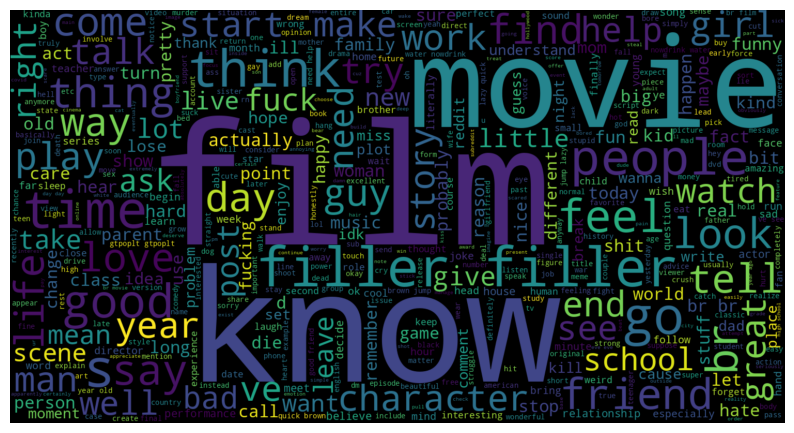

In [26]:
from wordcloud import WordCloud
text = " ".join(df[df['label'] == 0]['lemmas_back_to_text'])
plt.figure(figsize = (10, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


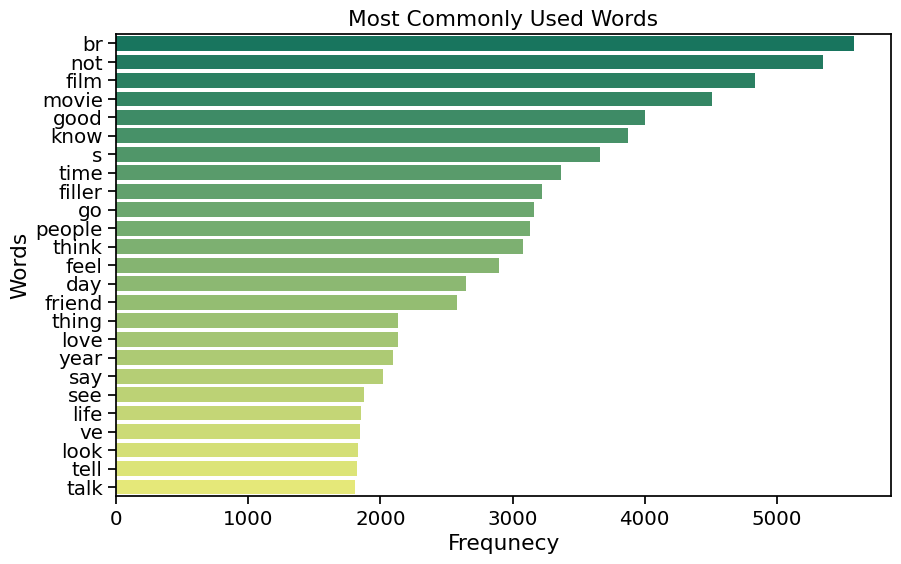

In [52]:
all_spam_words = []
for sentence in df[df['label'] == 0]['lemmas_back_to_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df0 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(10,6))
sns.barplot(y = df0['Word'], x= df0['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

label1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


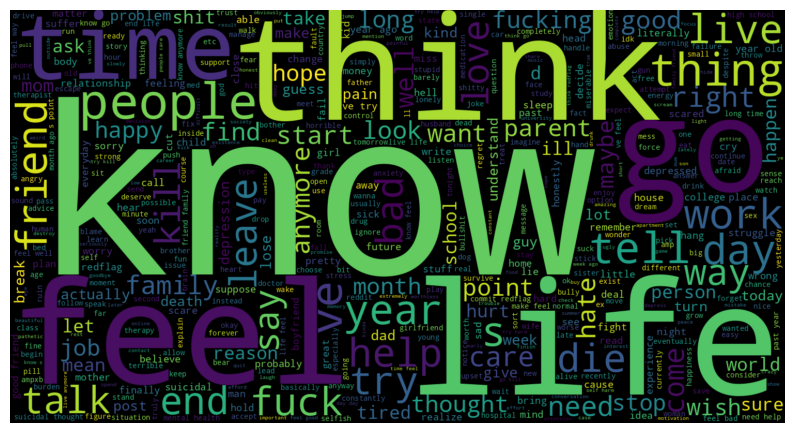

In [47]:
from wordcloud import WordCloud
text = " ".join(df[df['label'] == 1]['lemmas_back_to_text'])
plt.figure(figsize = (10, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


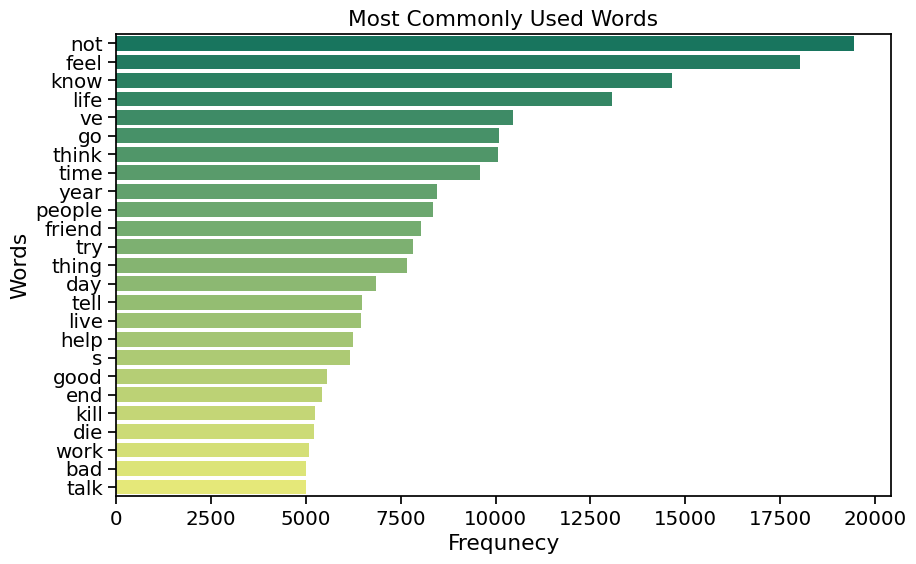

In [53]:
all_spam_words = []
for sentence in df[df['label'] == 1]['lemmas_back_to_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df1 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(10,6))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

#Before topic modelling

In [54]:
df['label'].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1])

In [55]:
df00 = df[df['label'] == 0]
df11 = df[df['label'] == 1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df00.count()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


original_tweets         14139
label                   14139
url_free_tweets         14139
username_free_tweets    14139
slang_free_tweets       14139
punc_free_tweets        14139
tokens                  14139
tokens_back_to_text     14139
lemmas                  14139
lemmas_back_to_text     14139
lemma_tokens            14139
dtype: int64

In [57]:
df11.count()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


original_tweets         13838
label                   13838
url_free_tweets         13838
username_free_tweets    13838
slang_free_tweets       13838
punc_free_tweets        13838
tokens                  13838
tokens_back_to_text     13838
lemmas                  13838
lemmas_back_to_text     13838
lemma_tokens            13838
dtype: int64

#Topic Modelling

#df00

In [58]:
# Create a id2word dictionary
id2word = Dictionary(df00['lemma_tokens'])
print(len(id2word))
     

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
     

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df00['lemma_tokens']]
     

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)
     

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
     

# Create Topics
topics = [' '.join(t[0:10]) for t in words]
     

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


41264
17327


------ Topic 0 ------
br film movie good time love go s not work

------ Topic 1 ------
not know s school time go year day think good

------ Topic 2 ------
not know feel friend people go s think talk say

------ Topic 3 ------
br filler film movie good s time great watch not

------ Topic 4 ------
day people good post help water think friend game know



In [60]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df00['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.9716952919137976

Coherence Score:  0.4270869546129862


In [61]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.059243  0.002522       1        1  35.425519
2      0.041937 -0.032774       2        1  24.113486
1      0.028602 -0.018855       3        1  15.130352
0     -0.052460 -0.000446       4        1  12.895011
4      0.041164  0.049553       5        1  12.435632, topic_info=        Term         Freq        Total Category  logprob  loglift
2200  filler  3509.000000  3509.000000  Default  30.0000  30.0000
124       br  5612.000000  5612.000000  Default  29.0000  29.0000
72       not  5225.000000  5225.000000  Default  28.0000  28.0000
467      day  2388.000000  2388.000000  Default  27.0000  27.0000
132     film  4892.000000  4892.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
381        s   238.228779  3607.184866   Topic5  -5.5945  -0.6328
132     film   247.867191  4892.521868   Topic5  -5.5548  -0.8980
124       br   208.466298  5612.148442   Topic5  -5.7280  -1.2083
248      ask   193.428490  1187.351536   Topic5  -5.8028   0.2700
72       not   195.400060  5225.026132   Topic5  -5.7927  -1.2016

[458 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
5348      1  0.105685   abt
5348      2  0.819058   abt
5348      3  0.026421   abt
5348      4  0.052842   abt
5348      5  0.026421   abt
...     ...       ...   ...
559       1  0.108301  zoom
559       2  0.126351  zoom
559       3  0.649806  zoom
559       4  0.018050  zoom
559       5  0.072201  zoom

[1242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [ ]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df0['lemmas_back_to_text'])
     

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             iid=True, n_jobs=1,
             param_grid={'n_topics': [10, 15, 20, 30], 
                         'learning_decay': [0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)
     

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: ignored

In [ ]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic    
     

# Can take a long time to run.
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df['lemma_tokens'],
                                                        start=2, limit=200, step=6)
     

In [ ]:
model_5_2 = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=68,
                       random_state=42,
                       chunksize=2000,
                       passes=25,
                       decay=0.5,
                       iterations=70)

#df11

In [62]:
# Create a id2word dictionary
id2word = Dictionary(df11['lemma_tokens'])
print(len(id2word))
     

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
     

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df11['lemma_tokens']]
     

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)
     

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
     

# Create Topics
topics = [' '.join(t[0:10]) for t in words]
     

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


35696
14098


------ Topic 0 ------
help friend feel tell people need go life thing talk

------ Topic 1 ------
life feel not people know go year ve thing tell

------ Topic 2 ------
not feel know ve time think go try life friend

------ Topic 3 ------
life not die think ve feel know fuck live day

------ Topic 4 ------
life know feel go think year time thing ve try



In [64]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df11['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.175011073726106

Coherence Score:  0.3186152108900651


In [65]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.018540  0.011160       1        1  39.299957
4     -0.000880  0.016298       2        1  23.282944
1     -0.005501  0.004009       3        1  18.601122
3     -0.014153 -0.027671       4        1  10.644407
0      0.039073 -0.003796       5        1   8.171570, topic_info=       Term          Freq         Total Category  logprob  loglift
26     help   6265.000000   6265.000000  Default  30.0000  30.0000
32     life  12862.000000  12862.000000  Default  29.0000  29.0000
265     die   4959.000000   4959.000000  Default  28.0000  28.0000
9       not  18552.000000  18552.000000  Default  27.0000  27.0000
314  people   8033.000000   8033.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
275   leave    285.957980   3723.351999   Topic5  -5.6223  -0.0620
52      try    353.298178   7703.071748   Topic5  -5.4109  -0.5776
110  family    286.178130   4058.339084   Topic5  -5.6216  -0.1474
9       not    326.945267  18552.656825   Topic5  -5.4884  -1.5341
265     die    291.346088   4959.664743   Topic5  -5.6037  -0.3301

[467 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4038      1  0.161519  abide
4038      2  0.161519  abide
4038      5  0.646077  abide
3657      2  0.096575    aca
3657      3  0.096575    aca
...     ...       ...    ...
5382      1  0.094895   york
5382      2  0.094895   york
5382      3  0.063263   york
5382      4  0.094895   york
5382      5  0.664262   york

[1104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1])